In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wrangled_data.csv')

In [3]:
df.head()

,Unnamed: 0,_SEX,_HCVU651,_AGEG5YR,_RACE,WTKG3,DIABETE4,_TOTINDA,_RFDRHV7,SLEPTIM1,SMOKE,MICHD,HEIGHT
0,0,2.0,2,8.0,1,48.080000,1,1.0,1.0,5,1,0,170.00000
1,1,2.0,2,10.0,2,77.110000,0,1.0,9.0,7,4,0,163.00000
2,2,2.0,2,10.0,2,82.320386,0,1.0,1.0,7,4,0,173.00000
3,3,2.0,2,13.0,1,82.320386,0,2.0,1.0,6,4,0,170.12426
4,4,2.0,2,13.0,1,57.150000,0,1.0,1.0,7,4,0,168.00000


In [4]:
df = df.drop('Unnamed: 0', axis=1)
df['BMI'] = df['WTKG3']/(pow(df['HEIGHT']/100., 2))
df=df[df['_AGEG5YR']!=14]

In [5]:
df.head()

,_SEX,_HCVU651,_AGEG5YR,_RACE,WTKG3,DIABETE4,_TOTINDA,_RFDRHV7,SLEPTIM1,SMOKE,MICHD,HEIGHT,BMI
0,2.0,2,8.0,1,48.080000,1,1.0,1.0,5,1,0,170.00000,16.636678
1,2.0,2,10.0,2,77.110000,0,1.0,9.0,7,4,0,163.00000,29.022545
2,2.0,2,10.0,2,82.320386,0,1.0,1.0,7,4,0,173.00000,27.505225
3,2.0,2,13.0,1,82.320386,0,2.0,1.0,6,4,0,170.12426,28.442967
4,2.0,2,13.0,1,57.150000,0,1.0,1.0,7,4,0,168.00000,20.248724


(0.0, 60.0)

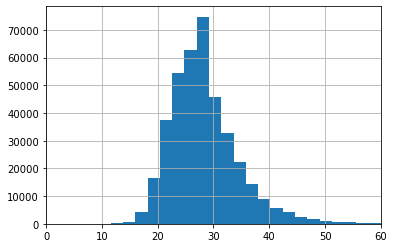

In [13]:
df['BMI'].hist(bins=100)
plt.xlim(0,60)

In [14]:
bmi_bin_width = (df['BMI'].mean() + 5*df['BMI'].std() - df['BMI'].min() )/10
bmi_max = df['BMI'].mean() + 5*df['BMI'].std()
bmi_bins_range = [df['BMI'].min()+i*bmi_bin_width for i in range(11)]

In [15]:
df = df[df['BMI'] <= bmi_max].reset_index()

In [16]:
#df.loc[1225,'BMI'] >= bmi_bins_range[4] and df.loc[1225,'BMI'] < bmi_bins_range[5]
bmi_bin = []
for i in range(len(df)):
    for j in range(10):
        if df.loc[i,'BMI'] >= bmi_bins_range[j] and df.loc[i,'BMI'] < bmi_bins_range[j+1] :
            bin_value = j
        else:
            pass
    bmi_bin.append(bin_value)

In [17]:
df['BMI_BIN'] = bmi_bin

Text(0, 0.5, 'Occurance of Heart Disease')

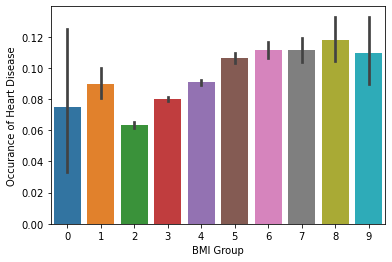

In [18]:
sns.barplot(x= 'BMI_BIN', y='MICHD', data = df)
plt.xlabel('BMI Group')
plt.ylabel('Occurance of Heart Disease')

Text(0, 0.5, 'Occurance of Heart Disease')

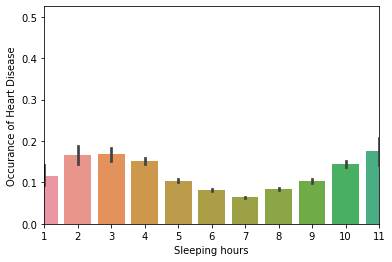

In [22]:
sns.barplot(x= 'SLEPTIM1', y='MICHD', data = df)
plt.xlabel('Sleeping hours')
plt.xlim(0,10)
plt.ylabel('Occurance of Heart Disease')

In [23]:
df['SLEPTIM1']

0          5
1          7
2          7
3          6
4          7
          ..
392573     6
392574    12
392575     8
392576     6
392577     6
Name: SLEPTIM1, Length: 392578, dtype: int64

## Calculation of conditional probability

In [138]:
#class conditional_probability(self, variable, condition, value):
    
def conditional_probability(variable,condition, value):
    dff=df.groupby(condition).sum()[variable]/df.groupby(condition).count()['BMI']
    return dff[value]

In [156]:
conditional_probability('MICHD','_SEX',2)

0.06775481446688586

In [196]:
cols = [ '_SEX','_HCVU651','_AGEG5YR','_RACE','DIABETE4','SMOKE','BMI_BIN']

In [197]:
condition_value={cols[i]:sorted(list(df[cols[i]].unique())) for i in range(len(cols))}

In [234]:
len(df[(df['_SEX'] ==2) & 
       (df['_HCVU651'] ==2) & 
       (df['_AGEG5YR'] ==13) & 
       (df['_RACE'] ==1) & 
       (df['DIABETE4'] ==1) & 
       (df['SMOKE'] ==4) & 
       (df['BMI_BIN'] ==3)])

594

In [216]:
condition_value

{'_SEX': [1, 2],
 '_HCVU651': [1, 2],
 '_AGEG5YR': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 '_RACE': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'DIABETE4': [0, 1],
 'SMOKE': [1, 2, 3, 4],
 'BMI_BIN': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}

In [230]:
len(df[df['BMI_BIN'] ==4])

120098

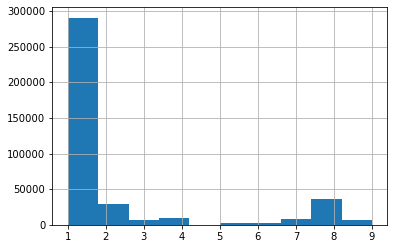

In [233]:
df['_RACE'].hist()